# Loading Data

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
dataset=pd.read_csv('data.csv')

data=pd.read_csv('data.csv')

In [51]:
dataset.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


# Analysing Data

In [52]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [53]:
data['timestamp'] = pd.to_datetime(data['timestamp'],errors='coerce')

data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%y-%m-%d %H:%M:%S')

data['timestamp'].head()

0   2018-02-28 21:00:00
1   2018-02-28 21:15:00
2   2018-02-28 10:15:00
3   2018-02-28 10:15:00
4   2018-02-28 10:30:00
Name: timestamp, dtype: datetime64[ns]

In [54]:
column_1 = data.iloc[:,0]

db=pd.DataFrame({#"year": column_1.dt.year,
              
                 #"month": column_1.dt.month,
                 "day": column_1.dt.day,
                 "hour": column_1.dt.hour,
                 #"dayofyear": column_1.dt.dayofyear,
                 "week": column_1.dt.week,
                 #"weekofyear": column_1.dt.weekofyear,
                 #"dayofweek": column_1.dt.dayofweek,
                 #"weekday": column_1.dt.weekday,
                 #"quarter": column_1.dt.quarter,
               })

C:\Users\HP\AppData\Local\Temp/ipykernel_10664/3685033255.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  "week": column_1.dt.week,


In [55]:
dataset1=dataset.drop('timestamp',axis=1)

data1=pd.concat([db,dataset1],axis=1)

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day        2068 non-null   float64
 1   hour       2068 non-null   float64
 2   week       2068 non-null   float64
 3   act379     2090 non-null   int64  
 4   act13      2090 non-null   int64  
 5   act279     2090 non-null   int64  
 6   act323     2090 non-null   int64  
 7   act363     2090 non-null   int64  
 8   act302     2090 non-null   int64  
 9   latitude   2090 non-null   float64
 10  longitude  2090 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 179.7 KB


In [56]:
data1.head()

,day,hour,week,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28.0,21.0,9.0,1,0,0,0,0,0,22.737260,75.875987
1,28.0,21.0,9.0,1,0,0,0,0,0,22.720992,75.876083
2,28.0,10.0,9.0,0,0,1,0,0,0,22.736676,75.883168
3,28.0,10.0,9.0,0,0,1,0,0,0,22.746527,75.887139
4,28.0,10.0,9.0,0,0,1,0,0,0,22.769531,75.888772


In [57]:
data1.dropna(inplace=True)

print(data1.head(3))

    day  hour  week  act379  act13  act279  act323  act363  act302   latitude  \
0  28.0  21.0   9.0       1      0       0       0       0       0  22.737260   
1  28.0  21.0   9.0       1      0       0       0       0       0  22.720992   
2  28.0  10.0   9.0       0      0       1       0       0       0  22.736676   

   longitude  
0  75.875987  
1  75.876083  
2  75.883168  


# Heatmap 

In [58]:
df=pd.read_csv('data-edit.csv')

df = df.rename(columns = {'type':'act'})
df.head(10)

,day,act,frequency
0,1,act379,121
1,1,act13,22
2,1,act279,88
3,1,act323,66
4,1,act363,33
5,1,act302,0
6,3,act379,66
7,3,act13,0
8,3,act279,121
9,3,act323,66


<AxesSubplot:xlabel='act', ylabel='day'>

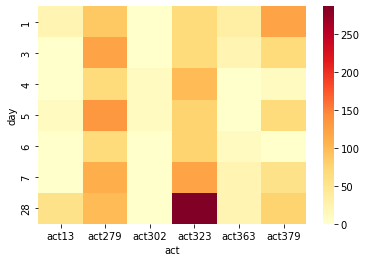

In [59]:
heatmap1_data = pd.pivot_table(df, values='frequency', 
                     index=['day'], 
                     columns="act")
sns.heatmap(heatmap1_data,cmap="YlOrRd")

# Analyzing Most Important Features

In [62]:
X=data1.iloc[:,[0,1,2,9,10]].values

X

array([[28.      , 21.      ,  9.      , 22.73726 , 75.875987],
       [28.      , 21.      ,  9.      , 22.720992, 75.876083],
       [28.      , 10.      ,  9.      , 22.736676, 75.883168],
       ...,
       [ 3.      , 12.      , 27.      , 22.531931, 75.769126],
       [ 3.      , 10.      , 27.      , 22.719569, 75.857726],
       [ 3.      , 23.      , 27.      , 22.686437, 76.032055]])

In [63]:
y=data1.iloc[:,[3,4,5,6,7,8]].values

y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

# Data Visualization and Analysis

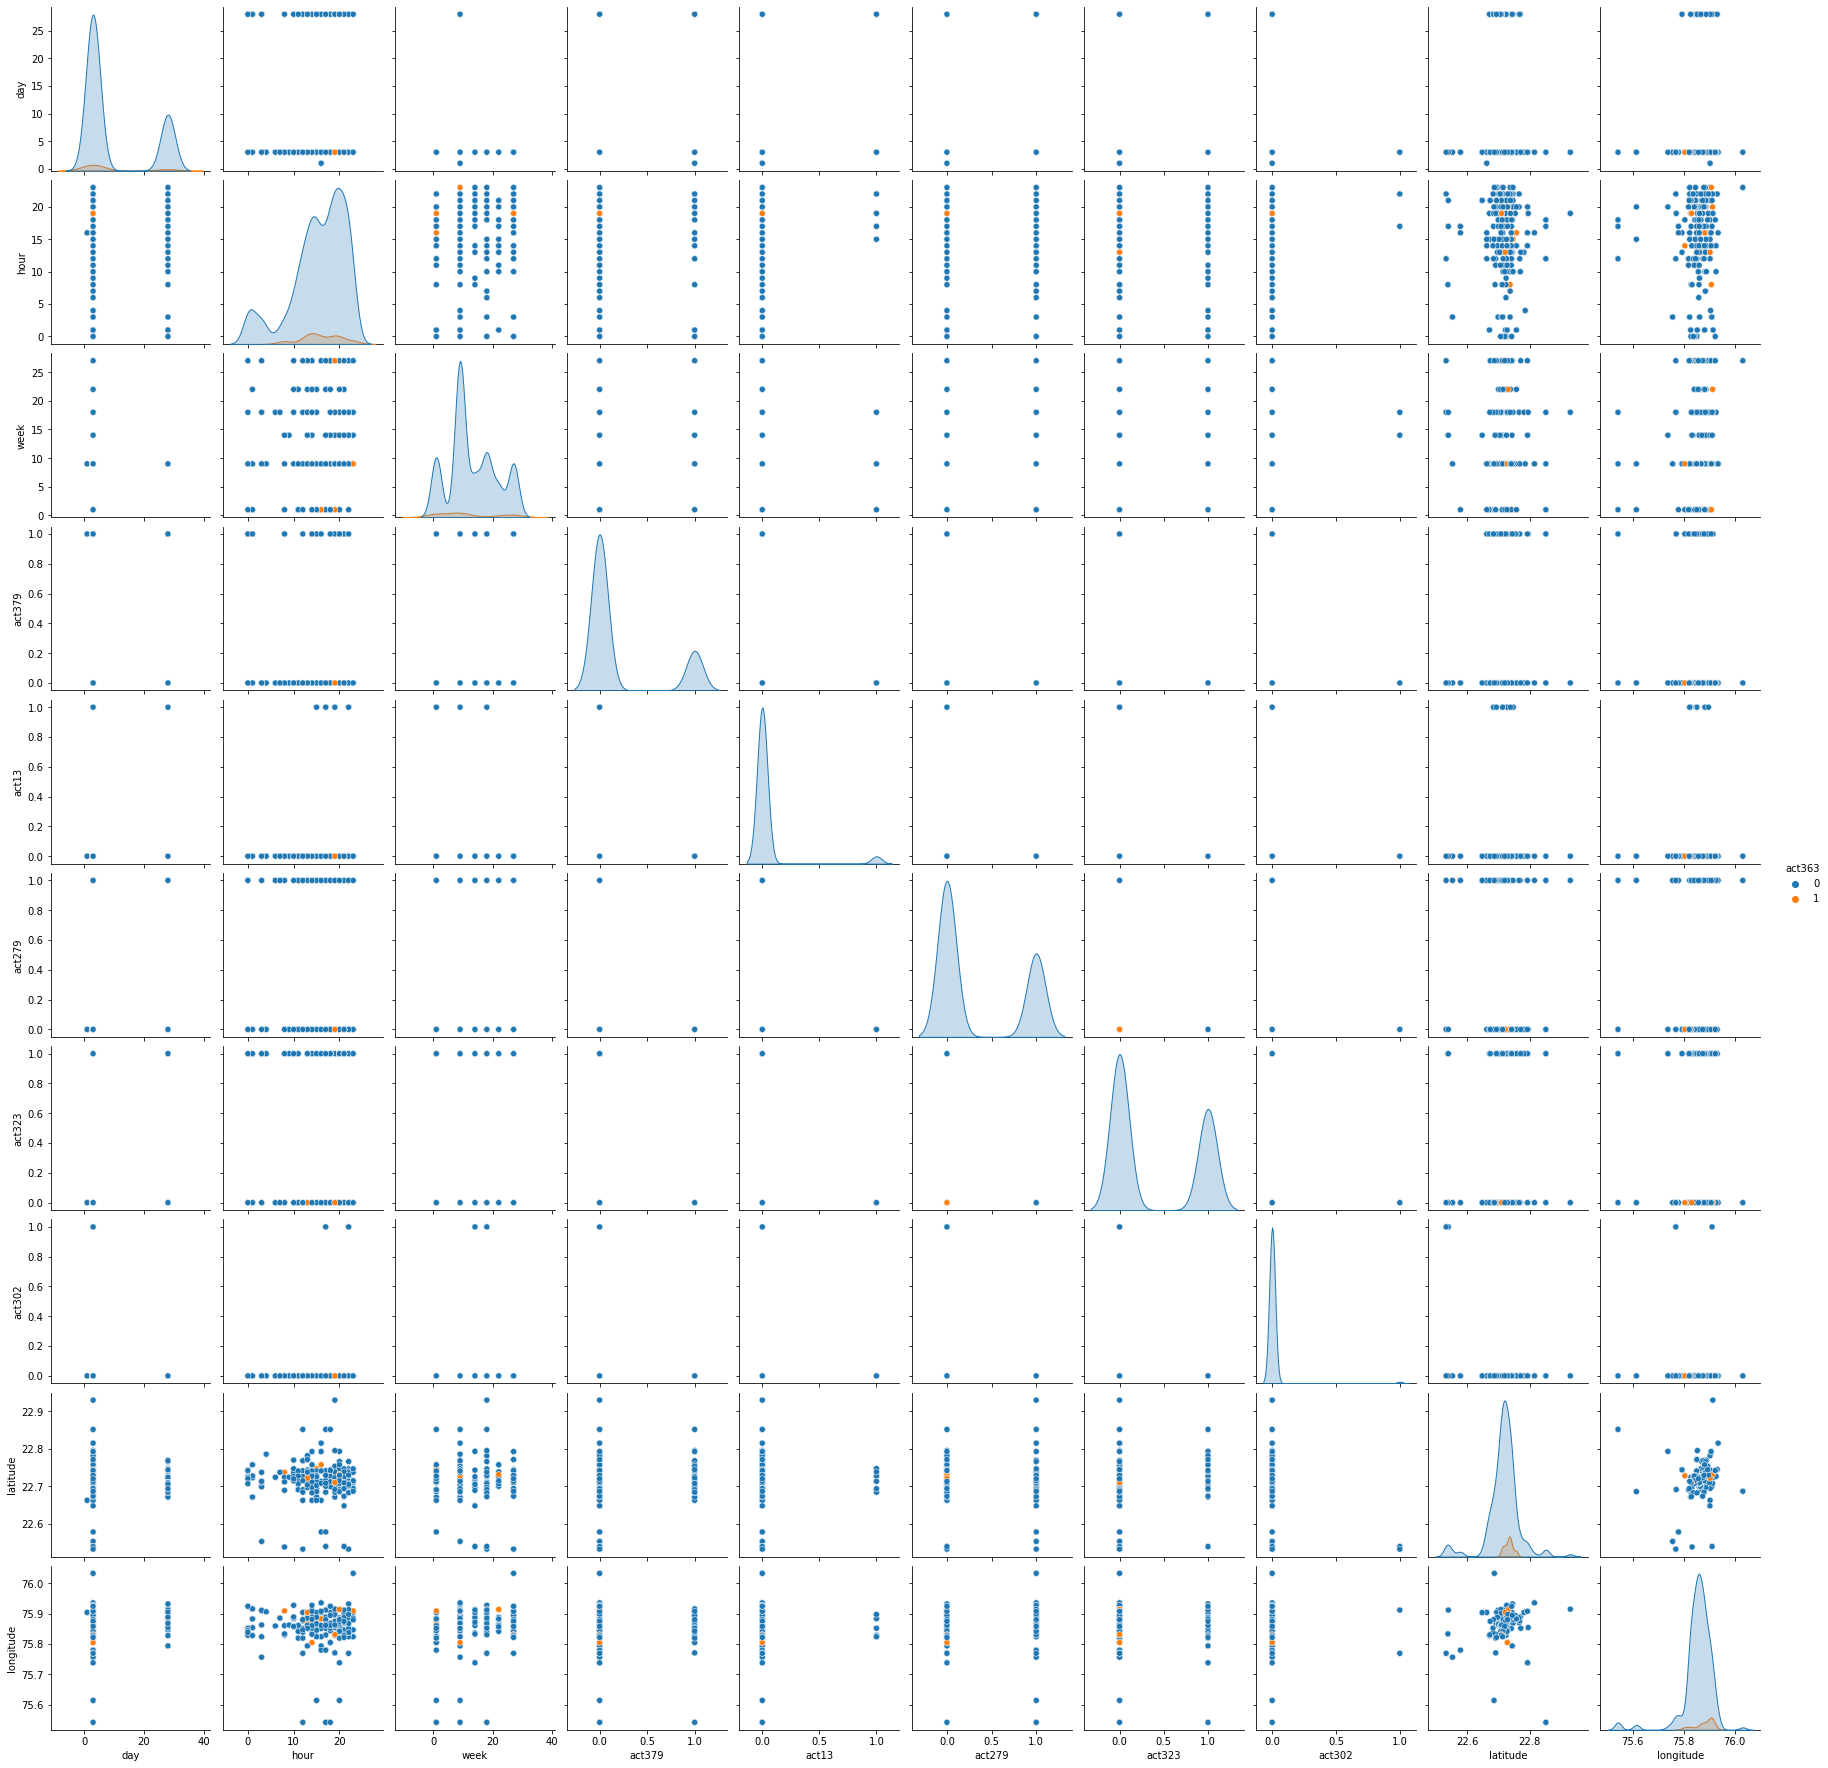

In [64]:
sns.pairplot(data1,hue='act363')

<AxesSubplot:xlabel='act379', ylabel='hour'>

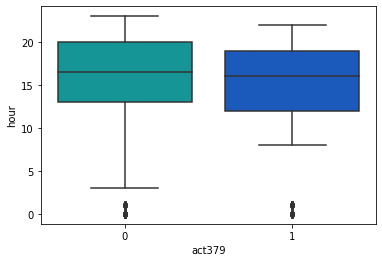

In [65]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

<AxesSubplot:xlabel='act13', ylabel='hour'>

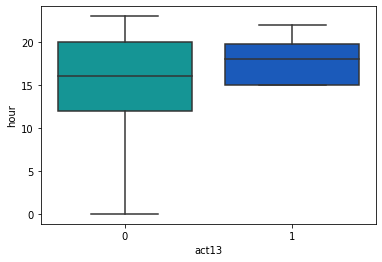

In [66]:
sns.boxplot(x='act13' ,y='hour' ,data=data1, palette='winter_r')

<AxesSubplot:xlabel='act323', ylabel='hour'>

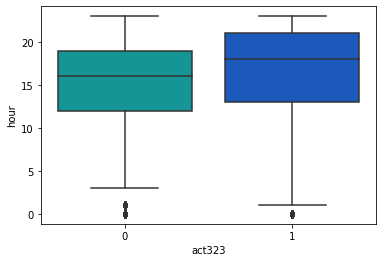

In [67]:
sns.boxplot(x='act323' ,y='hour' ,data=data1 , palette='winter_r')

<AxesSubplot:xlabel='act363', ylabel='hour'>

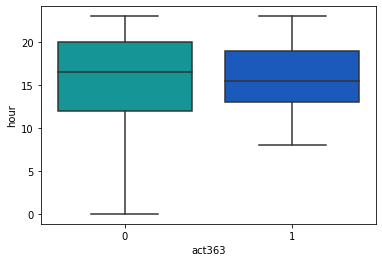

In [68]:
sns.boxplot(x='act363' ,y='hour' ,data=data1 , palette='winter_r')

In [69]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])

<AxesSubplot:xlabel='act13', ylabel='hour'>

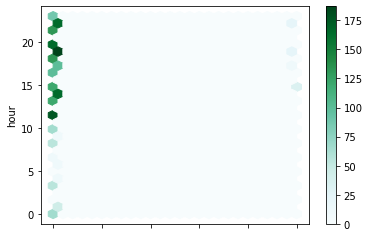

In [70]:
df.plot.hexbin(x='act13',y='hour',gridsize=25)

<AxesSubplot:>

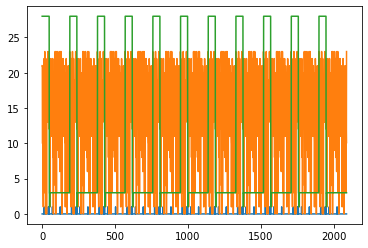

In [71]:
df.plot(legend=False)

In [72]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

<AxesSubplot:ylabel='Density'>

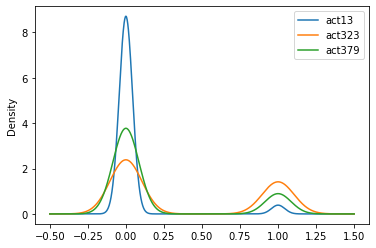

In [73]:
df1.plot.kde()

# Creating And Training KNN Model

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

print(X_train)

[[ 3.        9.       14.       22.724    75.8621  ]
 [28.        1.        9.       22.722247 75.915294]
 [ 3.       14.        9.       22.7278   75.8046  ]
 ...
 [ 1.       16.        9.       22.66215  75.9035  ]
 [28.       21.        9.       22.73726  75.875987]
 [28.       11.        9.       22.715121 75.856601]]


In [83]:
print(y_train)

[[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]


In [84]:
print(X_train.shape)

(1447, 5)


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print("importance of the features:")
print(model.feature_importances_)

importance of the features:
[0.03530347 0.3157808  0.1098402  0.28265818 0.25641735]


# Elbow Method For optimum value of K

In [170]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

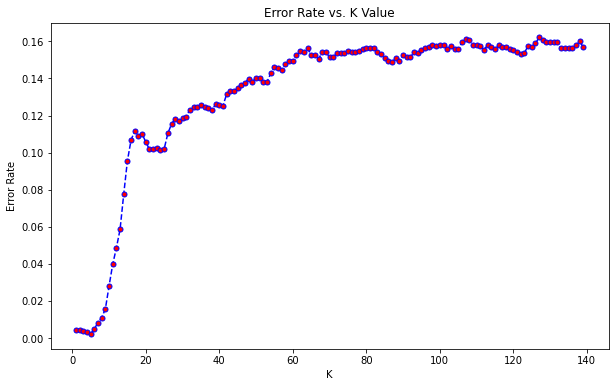

In [171]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [172]:
for i in range(1,15):
    print(error_rate[i])

0.004025764895330112
0.003757380568974772
0.00322061191626409
0.0021470746108427268
0.005099302200751476
0.008051529790660225
0.011003757380568975
0.015566290928609769
0.027911969940955447
0.03972088030059045
0.048577563070316694
0.05850778314546431
0.0775630703166935
0.09554482018250134


# KNN Model & Calculating KNN Score

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
knn.score(X_test,y_test)

0.9887278582930756

In [23]:
knn.score(X_train,y_train)

0.9896337249481686

# Calculating Errors

In [89]:
train_pred=knn.predict(X_train)

print(train_pred)

test_pred=knn.predict(X_test)

print(test_pred)

[[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]]
[[0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 ...
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]]


In [162]:
from sklearn.metrics import accuracy_score


In [163]:
print(accuracy_score(y_test, y_pred))

0.9871175523349437


In [90]:
train_pred=knn.predict(X_train)
train_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [91]:
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

train_rmse=mean_squared_error(train_pred,y_train)**0.5

test_rmse=mean_squared_error(test_pred,y_test)**0.5

predicted_data=np.round_(test_pred)

print("Mae: ",metrics.mean_absolute_error(y_test,test_pred))

print("rmse:",np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Mae:  0.0037573805689747716
rmse: 0.061297476040818935


In [166]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.89      0.83      0.86        29
           2       0.98      0.99      0.98       213
           3       1.00      1.00      1.00       214
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00         6

   micro avg       0.99      0.99      0.99       621
   macro avg       0.98      0.97      0.97       621
weighted avg       0.99      0.99      0.99       621
 samples avg       0.99      0.99      0.99       621



# BUILDING A PREDICTIVE SYSTEM

In [174]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X, y)
testSet = [[28.0,21.0,9.0,22.737260,75.875987]]
test = pd.DataFrame(testSet)
y_pred = classifier.predict(testSet)
print(y_pred)

[[1 0 0 0 0 0]]


In [176]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X, y)
testSet = [[1.0,10.0,9.0,22.769531,75.888772]]
test = pd.DataFrame(testSet)
y_pred = classifier.predict(testSet)
print(y_pred)

[[0 0 1 0 0 0]]


In [181]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X, y)
testSet = [[6.0,2.0,1.0,22.769531,75.888772]]
test = pd.DataFrame(testSet)
y_pred = classifier.predict(testSet)
print(y_pred)

[[1 0 0 0 0 0]]


# Creating & Training Decision Tree Model

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [97]:
y_pred=dtree.predict(X_test)

In [98]:
dtree.score(X_test,y_test)

0.9871175523349437

In [99]:
dtree.score(X_train,y_train)

0.9903248099516241

In [100]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)

In [108]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)
treefeatures

array([0.02502558, 0.29175072, 0.12271173, 0.31116923, 0.24934275])

In [141]:
features = data1.columns
print(features)

Index(['day', 'hour', 'week', 'act379', 'act13', 'act279', 'act323', 'act363',
       'act302', 'latitude', 'longitude'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

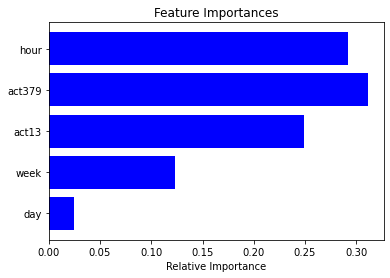

In [142]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Creating & Training Random Tree Model

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
y_pred=rfc.predict(X_test)

In [119]:
rfc.score(X_test,y_test)

0.9871175523349437

In [120]:
rfc.score(X_train,y_train)

0.9903248099516241

In [121]:
om=rfc.feature_importances_
indices = np.argsort(om)


In [122]:
om

array([0.03709224, 0.29873446, 0.09788484, 0.29115749, 0.27513098])

In [137]:
features = data1.columns
print(features)

Index(['day', 'hour', 'week', 'act379', 'act13', 'act279', 'act323', 'act363',
       'act302', 'latitude', 'longitude'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

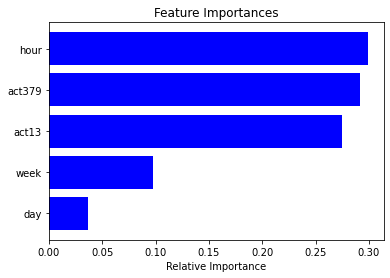

In [138]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Ploting Graphs

In [148]:
error_rate = []
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    predicted_data=np.round_(test_pred)

In [149]:
mae=[]
rmse=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_pred=knn.predict(X_train)
    test_pred=knn.predict(X_test)
    train_rmse=mean_squared_error(train_pred,y_train)**0.5
    test_rmse=mean_squared_error(test_pred,y_test)**0.5
    mae.append(metrics.mean_absolute_error(y_test,test_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

# RMSE vs K Value

Text(0, 0.5, 'Root mean absolute error')

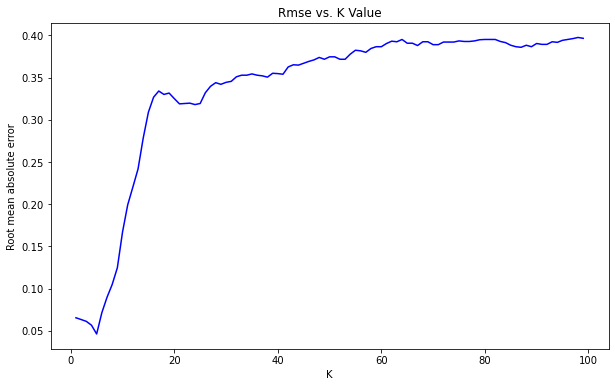

In [150]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),rmse,color='blue')
plt.title('Rmse vs. K Value')
plt.xlabel('K')
plt.ylabel('Root mean absolute error')

# MAE vs K Value

Text(0, 0.5, 'Mean absolute error')

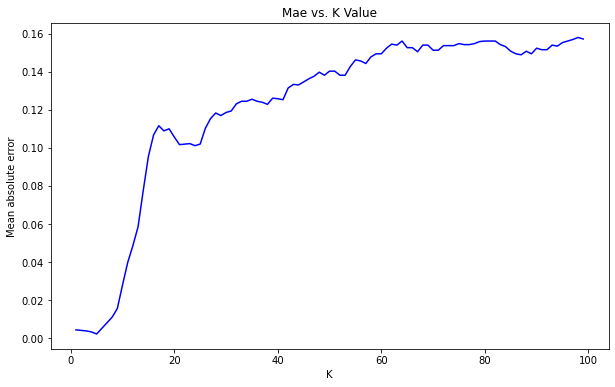

In [151]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),mae,color='blue')
plt.title('Mae vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean absolute error')

# Previous vs Proposed Graphs

In [152]:
mae_org=[0.0056360708534621577,
 0.0056360708534621577,
 0.0056360708534621577,
 0.0060386473429951681,
 0.0056360708534621577,
 0.0060386473429951681,
 0.0056360708534621577,
 0.0060386473429951681,
 0.0056360708534621577,
 0.01328502415458937,
 0.020933977455716585,
 0.035024154589371984,
 0.049114331723027378,
 0.055152979066022546,
 0.063204508856682773,
 0.078904991948470213,
 0.083735909822866342,
 0.097826086956521743,
 0.10829307568438003,
 0.10628019323671499,
 0.10628019323671499,
 0.10144927536231885,
 0.097826086956521729,
 0.097826086956521729,
 0.099838969404186795,
 0.099838969404186795,
 0.099838969404186795,
 0.1030595813204509,
 0.10386473429951693,
 0.10708534621578099,
 0.10789049919484701,
 0.10789049919484701,
 0.11151368760064412,
 0.11513687600644122,
 0.11916264090177135,
 0.12439613526570048,
 0.12560386473429952,
 0.12681159420289856,
 0.12399355877616748,
 0.12278582930756844,
 0.12198067632850242,
 0.12238325281803543,
 0.12278582930756844,
 0.12278582930756844,
 0.12479871175523349,
 0.1280193236714976,
 0.12721417069243157,
 0.12962962962962965,
 0.12962962962962965,
 0.13566827697262482,
 0.13768115942028986,
 0.14170692431561996,
 0.14331723027375201,
 0.14573268921095009,
 0.14452495974235105,
 0.14170692431561996,
 0.14090177133655393,
 0.1461352657004831,
 0.14452495974235105,
 0.14452495974235105,
 0.14412238325281804,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15338164251207728,
 0.15821256038647344,
 0.15579710144927536,
 0.15660225442834139,
 0.15901771336553946,
 0.1602254428341385,
 0.15821256038647344,
 0.15901771336553946,
 0.15821256038647344,
 0.1602254428341385,
 0.16062801932367152,
 0.16223832528180357,
 0.16264090177133655,
 0.15982286634460549,
 0.1610305958132045,
 0.1610305958132045,
 0.16143317230273752,
 0.16143317230273752,
 0.16183574879227053,
 0.16223832528180357,
 0.16223832528180357,
 0.16143317230273754,
 0.16223832528180357,
 0.16223832528180357,
 0.16062801932367152,
 0.15942028985507248,
 0.15942028985507248,
 0.15942028985507248,
 0.15901771336553946,
 0.15901771336553946,
 0.15861513687600645,
 0.15861513687600645,
 0.15861513687600645]

# MAE vs K Value

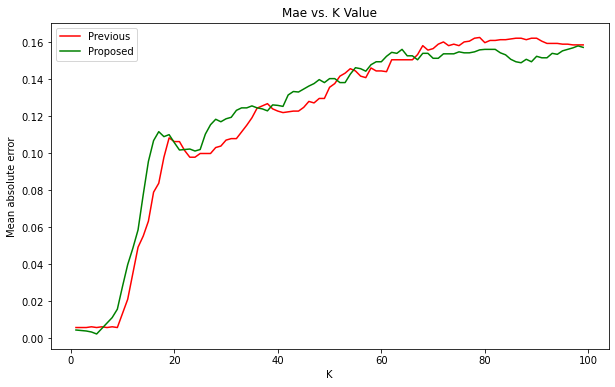

In [153]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),mae_org,color='red',label='Previous')
plt.plot(range(1,100),mae,color='green',label='Proposed')
plt.title('Mae vs. K Value')
plt.xlabel('K')
plt.ylabel('Mean absolute error')
plt.legend()

In [154]:
rmse_org=[0.0750737694102418,
 0.0750737694102418,
 0.0750737694102418,
 0.07770873402002614,
 0.0750737694102418,
 0.0750737694102418,
 0.0750737694102418,
 0.07770873402002614,
 0.0802572353905128,
 0.11526067913468743,
 0.14468578871373852,
 0.18606874562870296,
 0.22161753478239798,
 0.23484671397748477,
 0.2514050692740359,
 0.2809003238667948,
 0.28937157742747704,
 0.31277162108561213,
 0.32907913286074525,
 0.325388409054751,
 0.325388409054751,
 0.3178784341108812,
 0.31212739461154115,
 0.31212739461154115,
 0.31533536578483196,
 0.31533536578483196,
 0.31533536578483196,
 0.32040131839759634,
 0.32165534009244107,
 0.32662328411527547,
 0.3278535079960469,
 0.3278535079960469,
 0.33333333333333337,
 0.3387245186237752,
 0.3457820374040623,
 0.3532686113359542,
 0.3549738599162374,
 0.3566709557735695,
 0.3521271911911482,
 0.35040808967198295,
 0.34925732108075047,
 0.3498331785552014,
 0.35040808967198295,
 0.3544063553807966,
 0.3532686113359542,
 0.35779788103271043,
 0.36059978663216463,
 0.3617144717843463,
 0.3600411499115478,
 0.3661392781640516,
 0.3721374912574059,
 0.37750771819220597,
 0.3796345390672693,
 0.3817495110814814,
 0.38016438515772494,
 0.37643980171551994,
 0.375368847051209,
 0.3796345390672693,
 0.37750771819220597,
 0.378040545159139,
 0.37750771819220597,
 0.3859446866161188,
 0.3859446866161188,
 0.3859446866161188,
 0.3859446866161188,
 0.3859446866161188,
 0.38957840873686167,
 0.3957300272007943,
 0.39522104946321923,
 0.3962383511447048,
 0.3992747047523453,
 0.40078425533405315,
 0.3992747047523453,
 0.39877025135476124,
 0.3967460238079361,
 0.3992747047523453,
 0.39977852161491306,
 0.4017874715601988,
 0.4017874715601988,
 0.3977594252641582,
 0.39977852161491306,
 0.3992747047523453,
 0.39977852161491306,
 0.39977852161491306,
 0.4002817043459999,
 0.40078425533405315,
 0.40078425533405315,
 0.4002817043459999,
 0.40278818910415376,
 0.40278818910415376,
 0.40078425533405315,
 0.40078425533405315,
 0.40078425533405315,
 0.3992747047523453,
 0.3957300272007943,
 0.3957300272007943,
 0.3957300272007943,
 0.3957300272007943,
 0.3957300272007943]

# RMSE vs K Vlaue

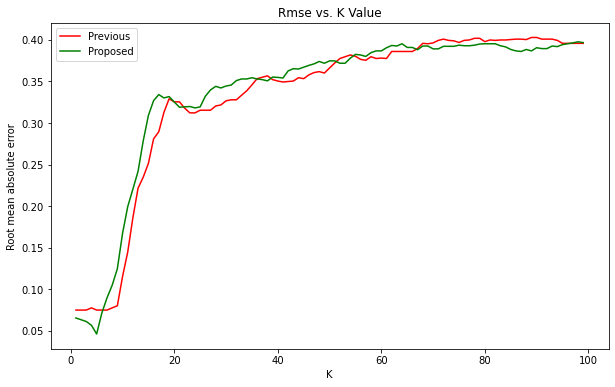

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),rmse_org,color='red',label='Previous')
plt.plot(range(1,100),rmse,color='green',label='Proposed')
plt.title('Rmse vs. K Value')
plt.xlabel('K')
plt.ylabel('Root mean absolute error')
plt.legend()
plt.show()

In [156]:
error_rate_org=[0.0056360708534621577,
 0.0056360708534621577,
 0.0056360708534621577,
 0.006038647342995169,
 0.0056360708534621577,
 0.006038647342995169,
 0.0056360708534621577,
 0.006038647342995169,
 0.0056360708534621577,
 0.013285024154589372,
 0.020933977455716585,
 0.035024154589371984,
 0.049114331723027378,
 0.055152979066022546,
 0.063204508856682773,
 0.078904991948470213,
 0.083735909822866342,
 0.097826086956521743,
 0.10829307568438003,
 0.10628019323671498,
 0.10628019323671498,
 0.10144927536231885,
 0.097826086956521743,
 0.097826086956521743,
 0.099838969404186795,
 0.099838969404186795,
 0.099838969404186795,
 0.10305958132045089,
 0.10386473429951691,
 0.107085346215781,
 0.10789049919484701,
 0.10789049919484701,
 0.11151368760064412,
 0.11513687600644122,
 0.11916264090177134,
 0.12439613526570048,
 0.12560386473429952,
 0.12681159420289856,
 0.12399355877616747,
 0.12278582930756844,
 0.12198067632850242,
 0.12238325281803543,
 0.12278582930756844,
 0.12278582930756844,
 0.12479871175523349,
 0.1280193236714976,
 0.12721417069243157,
 0.12962962962962962,
 0.12962962962962962,
 0.13566827697262479,
 0.13768115942028986,
 0.14170692431561996,
 0.14331723027375201,
 0.14573268921095009,
 0.14452495974235105,
 0.14170692431561996,
 0.14090177133655393,
 0.1461352657004831,
 0.14452495974235105,
 0.14452495974235105,
 0.14412238325281804,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15056360708534622,
 0.15338164251207728,
 0.15821256038647344,
 0.15579710144927536,
 0.15660225442834139,
 0.15901771336553946,
 0.16022544283413848,
 0.15821256038647344,
 0.15901771336553946,
 0.15821256038647344,
 0.16022544283413848,
 0.16062801932367149,
 0.16223832528180354,
 0.16264090177133655,
 0.15982286634460546,
 0.1610305958132045,
 0.1610305958132045,
 0.16143317230273752,
 0.16143317230273752,
 0.16183574879227053,
 0.16223832528180354,
 0.16223832528180354,
 0.16143317230273752,
 0.16223832528180354,
 0.16223832528180354,
 0.16062801932367149,
 0.15942028985507245,
 0.15942028985507245,
 0.15942028985507245,
 0.15901771336553946,
 0.15901771336553946,
 0.15861513687600645,
 0.15861513687600645,
 0.15861513687600645]

# Error Rate vs K Value

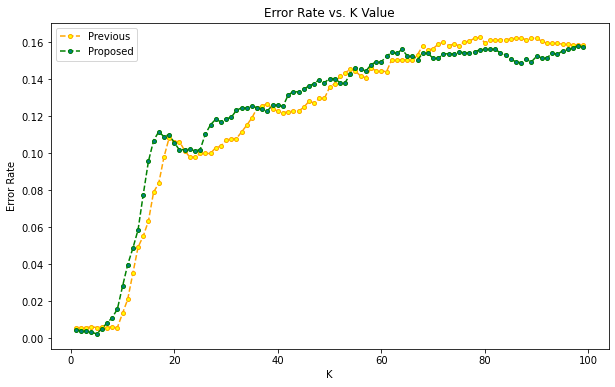

In [157]:
plt.figure(figsize=(10,6))

plt.plot(range(1,100),error_rate_org,color='orange', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=4,label='Previous')
plt.plot(range(1,100),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='teal', markersize=4,label='Proposed')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()